In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image
import cv2
import numpy as np

In [101]:
path = '../dataset/cats_dogs/'
classes = os.listdir(os.path.join(path,'train'))
test_dir = os.path.join(path,'test')
train_dir = os.path.join(path, 'train')

In [102]:
def identify_dimention(image):
    with Image.open(image) as img:
        width, height = img.size
        print(width, height)

In [103]:
images_train_cat = os.listdir(os.path.join(train_dir, 'cats/'))
images_train_dog = os.listdir(os.path.join(train_dir, 'dogs/'))
images_test_cat = os.listdir(os.path.join(test_dir, 'cats/'))
images_test_dog = os.listdir(os.path.join(test_dir, 'dogs/'))

In [104]:
for i in images_test_cat:
    base = os.path.join(test_dir, 'cats/', i)
    identify_dimention(base)

498 415
375 499
500 399
499 375
360 359
499 334
174 310
499 375
335 500
500 412
499 375
199 267
499 375
499 375
500 374
300 224
105 200
276 374
499 333
499 375
399 311
250 134
254 269
499 375
499 375
264 499
500 333
459 390
121 139
499 438
242 165
499 375
500 376
327 500
288 266
439 499
499 375
500 374
234 410
299 217
300 431
499 375
249 467
500 263
499 375
500 374
325 312
350 299
499 319
500 374
375 233
352 307
173 183
399 281
360 180
499 375
375 499
499 242
479 389
478 499
242 216
500 374
399 272
494 500
400 350
499 486
410 499
499 423
500 437
499 397
431 353
480 405
437 378
500 330
499 375
320 239
262 499
499 375
500 364
499 375
116 150
499 375
499 347
500 465
308 299
453 500
500 374
308 500
385 384
500 374
499 332
249 186
335 359
184 159
500 374
499 375
283 380
287 319
374 500
499 375
333 415
499 375
499 375
459 363
500 374
499 375
215 162
499 335
480 359
500 374
499 375
500 374
490 499
436 500
379 396
135 134
375 499
500 374
300 198
499 371
499 478
299 264
500 374
499 289
449 303


#### So dataset of images with different dimensions for classification, I need to resize all images to a common size

In [105]:
INPUT_SHAPE = (224,224) # common size(width, height)
BATCH_SIZE = 32

In [106]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                       image_size=INPUT_SHAPE,
                                                       subset='training',
                                                       seed=42,
                                                       validation_split=0.1,
                                                       batch_size=BATCH_SIZE)
validation_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                       image_size=INPUT_SHAPE,
                                                       subset='validation',
                                                       seed=42,
                                                       validation_split=0.1,
                                                       batch_size=BATCH_SIZE)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                       image_size=INPUT_SHAPE,
                                                       batch_size=32)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [133]:
for image,label in train_data.take(1):
    image = image
    label = label
    break


In [108]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
])
train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True),y))

In [109]:
for image, label in train_data.take(1):
    print(image)
    print(label)
    break

tf.Tensor(
[[[[151.82396  146.2716   141.96922 ]
   [164.18137  156.81616  152.35693 ]
   [169.4739   160.9094   155.8705  ]
   ...
   [180.85823  162.85823  152.85823 ]
   [167.5782   149.58086  139.67001 ]
   [111.379654  90.52803   81.85137 ]]

  [[128.18214  121.730194 116.0677  ]
   [165.41124  157.2614   150.75977 ]
   [165.57959  156.75398  150.45029 ]
   ...
   [182.21152  164.84076  154.68344 ]
   [172.40549  156.23834  145.83499 ]
   [176.7019   159.52623  149.5554  ]]

  [[134.35027  123.607346 117.42554 ]
   [146.48026  135.04808  128.79819 ]
   [152.26562  142.94702  136.05225 ]
   ...
   [184.89311  169.05055  158.51845 ]
   [176.57106  162.0593   151.18723 ]
   [173.87772  159.12631  148.37679 ]]

  ...

  [[116.225555  63.162605  42.737038]
   [140.81337   97.93892   74.94874 ]
   [165.7918   132.94647  109.91693 ]
   ...
   [137.68283  124.177795 123.0128  ]
   [138.44266  128.62968  124.52384 ]
   [144.74425  136.4922   131.11823 ]]

  [[ 99.085205  41.92809   22.0124

In [110]:
train_data = train_data.map(lambda x, y: (x/255, y))
validation_data = validation_data.map(lambda x, y: (x/255, y))
test_data = test_data.map(lambda x, y: (x/255, y))

In [111]:
for image, label in train_data.take(1):
    print(image)
    print(label)
    break

tf.Tensor(
[[[[0.37426537 0.38602927 0.34941894]
   [0.3753511  0.38328925 0.35695425]
   [0.37953174 0.38180766 0.37421444]
   ...
   [0.4924895  0.523862   0.5356267 ]
   [0.49276212 0.52413464 0.53589934]
   [0.4763311  0.50770366 0.51946837]]

  [[0.39844313 0.40951356 0.38202494]
   [0.4084868  0.41389966 0.39689463]
   [0.40159637 0.40250084 0.3993882 ]
   ...
   [0.47780138 0.5091739  0.5209386 ]
   [0.4873433  0.5187159  0.5304806 ]
   [0.48956767 0.5209402  0.5327049 ]]

  [[0.41441345 0.42196685 0.40539095]
   [0.39765394 0.40099785 0.3956176 ]
   [0.3828296  0.3828296  0.3828296 ]
   ...
   [0.45373872 0.4851113  0.496876  ]
   [0.47340447 0.504777   0.5165417 ]
   [0.487642   0.51901454 0.53077924]]

  ...

  [[0.47528082 0.49366298 0.5054277 ]
   [0.4952913  0.51317704 0.52494174]
   [0.5189041  0.53627574 0.54804045]
   ...
   [0.71913546 0.80221397 0.8455401 ]
   [0.73386365 0.81277883 0.8489494 ]
   [0.74769974 0.8237993  0.8539335 ]]

  [[0.4835425  0.50315034 0.514915

#### modeling

In [118]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3),input_shape=(224,224,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [119]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,675,713 (170.42 MB)

 Trainable params: 44,675,457 (170.42 MB)

 Non-trainable params: 256 (1.00 KB)

In [120]:
history = model.fit(train_data, validation_data=validation_data, epochs=10)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.5393 - loss: 0.9195 - val_accuracy: 0.5213 - val_loss: 0.7019
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.5969 - loss: 0.6619 - val_accuracy: 0.5300 - val_loss: 0.8931
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.6139 - loss: 0.6512 - val_accuracy: 0.5288 - val_loss: 0.9008
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.6535 - loss: 0.6227 - val_accuracy: 0.5675 - val_loss: 0.7908
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.6535 - loss: 0.6134 - val_accuracy: 0.6538 - val_loss: 0.6112
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.6687 - loss: 0.5965 - val_accuracy: 0.7088 - val_loss: 0.5712
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.6910 - loss: 0.5798 - val_accuracy: 0.7375 - val_loss: 0.5554
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 7398s 33s/step - accuracy: 0.7003 - loss: 0.5654 - val_ac

In [121]:
history.history

{'accuracy': [0.5659722089767456,
  0.5984722375869751,
  0.6134722232818604,
  0.652222216129303,
  0.6722221970558167,
  0.6856944561004639,
  0.695972204208374,
  0.7083333134651184,
  0.722777783870697,
  0.7340278029441833],
 'loss': [0.7311229705810547,
  0.6596254706382751,
  0.649541437625885,
  0.6182473301887512,
  0.5995364189147949,
  0.587081789970398,
  0.5692499279975891,
  0.555952787399292,
  0.5457160472869873,
  0.5332644581794739],
 'val_accuracy': [0.5212500095367432,
  0.5299999713897705,
  0.5287500023841858,
  0.5674999952316284,
  0.6537500023841858,
  0.7087500095367432,
  0.737500011920929,
  0.6725000143051147,
  0.75,
  0.6287500262260437],
 'val_loss': [0.7019479274749756,
  0.8931137919425964,
  0.9007953405380249,
  0.7908421158790588,
  0.6112024188041687,
  0.5711670517921448,
  0.5553874373435974,
  0.5918800830841064,
  0.5163363814353943,
  0.6780190467834473]}

In [122]:
y_pred = model.predict(test_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step


In [123]:
y_pred

array([[0.07727934],
       [0.08829619],
       [0.13172752],
       ...,
       [0.94727415],
       [0.30352232],
       [0.4504839 ]], dtype=float32)

In [124]:
test_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [125]:
model.evaluate(test_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.6340 - loss: 0.6765


[0.692464292049408, 0.6205000281333923]

In [126]:
for i, labels in test_data:
    print(labels)

tf.Tensor([1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0], shape=(32,), dtype=int32)
tf.Tensor([1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1], shape=(32,), dtype=int32)
tf.Tensor([0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0], shape=(32,), dtype=int32)
tf.Tensor([1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 

In [3]:
img = cv2.imread('../dataset/cats_dogs/test/cats/cat.4015.jpg')

In [4]:
img = Image.open('../dataset/cats_dogs/test/cats/cat.4015.jpg')

In [5]:
img = img.resize((224,224))

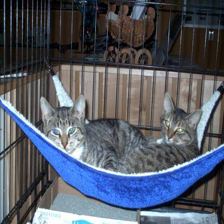

In [6]:
img

In [7]:
img=np.array(img)

In [8]:
img

array([[[  1,   2,   2],
        [  1,   0,   0],
        [  2,   1,   4],
        ...,
        [ 20,  28,  39],
        [ 20,  31,  39],
        [ 22,  35,  41]],

       [[  1,   3,   2],
        [  2,   1,   0],
        [  3,   1,   5],
        ...,
        [ 20,  28,  39],
        [  6,  18,  26],
        [  6,  20,  27]],

       [[  1,   4,   4],
        [  3,   2,   1],
        [  4,   2,   6],
        ...,
        [ 28,  36,  47],
        [ 17,  28,  37],
        [ 20,  32,  41]],

       ...,

       [[114, 129, 142],
        [116, 130, 140],
        [ 52,  64,  72],
        ...,
        [ 43,  41,  42],
        [ 33,  35,  36],
        [ 17,  20,  21]],

       [[108, 124, 136],
        [ 79,  93, 104],
        [ 34,  47,  55],
        ...,
        [ 39,  38,  38],
        [ 45,  44,  46],
        [ 16,  15,  18]],

       [[ 75,  91, 104],
        [ 20,  34,  45],
        [ 17,  29,  38],
        ...,
        [ 29,  28,  28],
        [ 56,  53,  56],
        [ 33,  29,  33]]

In [183]:
img.shape

(224, 224, 3)

ValueError: cannot reshape array of size 150528 into shape (0,224,224,3)